In [1]:
import pandas as pd
import requests
from io import StringIO

%matplotlib inline

import numpy as np
#import modin.pandas as pd
import matplotlib.pyplot as plt

#import cufflinks as cf
#cf.go_offline()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

%matplotlib inline
import numpy as np
import seaborn as sns; sns.set()

#from pathos.multiprocessing import ProcessingPool as Pool
import pandas.util.testing as tm
import multiprocessing as mp

/Users/daniel.clark/.pyenv/versions/3.7.5/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/daniel.clark/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [2]:
male_drive = 'https://drive.google.com/file/d/1lzz2ykpEs8HNPLGUay3S5xI8MVnLVNXY/view?usp=sharing'

file_id = male_drive.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
maleclean = pd.read_csv(csv_raw)
maleclean.head()
maleclean = maleclean.iloc[0:167056]

/Users/daniel.clark/.pyenv/versions/3.7.5/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
maleclean.head()

,Unnamed: 0,FID,Id,Bear_ID,SAMPLEID,TURNANGLE,STEPLENGTH,BEARING,OBSERVED,datetime,...,naturalMAX,naturalBEG,naturalEND,NatnegLWM,NatnegMIN,NatnegMAX,NatnegBEG,NatnegEND,STRATUM,resid
0,1.0,0.0,0.0,1.0,0.0,-30.452138,1517.096556,206.512289,1.0,40312.87,...,1.0,1.0,1.0,-532.332639,-1094.897217,30.0,-1050.0,-123.693169,1.0,1.618859
1,2.0,1.0,0.0,1.0,1.0,86.333287,129.714618,323.297713,0.0,40312.87,...,1.0,1.0,1.0,-1094.048479,-1140.394653,-1050.0,-1050.0,-1140.394653,1.0,-0.432693
2,3.0,2.0,0.0,1.0,2.0,64.160478,202.879209,301.124905,0.0,40312.87,...,1.0,1.0,1.0,-1142.342003,-1230.365845,-1050.0,-1050.0,-1230.365845,1.0,-0.431176
3,4.0,3.0,0.0,1.0,3.0,76.329050,592.086980,313.293477,0.0,40312.87,...,1.0,1.0,1.0,-1279.810606,-1500.299927,-1050.0,-1050.0,-1471.223999,1.0,-0.411518
4,5.0,4.0,0.0,1.0,4.0,95.750746,488.597687,332.715173,0.0,40312.87,...,1.0,1.0,1.0,-1182.258755,-1339.290894,-1050.0,-1050.0,-1339.290894,1.0,-0.413950


In [4]:

maleclean = maleclean[(maleclean.OBSERVED == 1)]

In [5]:
maleclean['time_difference'] = maleclean['datetime'] - maleclean['datetime'].shift(1)

maleclean.head()

,Unnamed: 0,FID,Id,Bear_ID,SAMPLEID,TURNANGLE,STEPLENGTH,BEARING,OBSERVED,datetime,...,naturalBEG,naturalEND,NatnegLWM,NatnegMIN,NatnegMAX,NatnegBEG,NatnegEND,STRATUM,resid,time_difference
0,1.0,0.0,0.0,1.0,0.0,-30.452138,1517.096556,206.512289,1.0,40312.87,...,1.0,1.0,-532.332639,-1094.897217,30.000000,-1050.000000,-123.693169,1.0,1.618859,NaN
11,12.0,11.0,0.0,1.0,11.0,159.062774,10976.395250,5.575063,1.0,40312.99,...,1.0,1.0,-386.807540,-1527.939819,30.000000,-123.693169,-323.109894,2.0,1.915140,0.12
22,23.0,22.0,0.0,1.0,22.0,13.421145,274.369610,18.996208,1.0,40315.83,...,1.0,1.0,-421.635078,-499.299500,-323.109894,-323.109894,-499.299500,3.0,1.743724,2.84
33,34.0,33.0,0.0,1.0,33.0,0.275270,2971.702329,19.271478,1.0,40315.95,...,1.0,1.0,-962.998814,-1290.348755,-499.299500,-499.299500,-780.576721,4.0,1.553802,0.12
44,45.0,44.0,0.0,1.0,44.0,72.206930,1442.735701,91.478408,1.0,40316.08,...,1.0,0.0,-188.676923,-780.576721,60.000000,-780.576721,30.000000,5.0,1.790825,0.13


In [6]:
maleclean['time_difference'] = maleclean['time_difference'].fillna(0)


In [7]:
maleclean.head()

,Unnamed: 0,FID,Id,Bear_ID,SAMPLEID,TURNANGLE,STEPLENGTH,BEARING,OBSERVED,datetime,...,naturalBEG,naturalEND,NatnegLWM,NatnegMIN,NatnegMAX,NatnegBEG,NatnegEND,STRATUM,resid,time_difference
0,1.0,0.0,0.0,1.0,0.0,-30.452138,1517.096556,206.512289,1.0,40312.87,...,1.0,1.0,-532.332639,-1094.897217,30.000000,-1050.000000,-123.693169,1.0,1.618859,0.00
11,12.0,11.0,0.0,1.0,11.0,159.062774,10976.395250,5.575063,1.0,40312.99,...,1.0,1.0,-386.807540,-1527.939819,30.000000,-123.693169,-323.109894,2.0,1.915140,0.12
22,23.0,22.0,0.0,1.0,22.0,13.421145,274.369610,18.996208,1.0,40315.83,...,1.0,1.0,-421.635078,-499.299500,-323.109894,-323.109894,-499.299500,3.0,1.743724,2.84
33,34.0,33.0,0.0,1.0,33.0,0.275270,2971.702329,19.271478,1.0,40315.95,...,1.0,1.0,-962.998814,-1290.348755,-499.299500,-499.299500,-780.576721,4.0,1.553802,0.12
44,45.0,44.0,0.0,1.0,44.0,72.206930,1442.735701,91.478408,1.0,40316.08,...,1.0,0.0,-188.676923,-780.576721,60.000000,-780.576721,30.000000,5.0,1.790825,0.13


In [8]:
maleclean['stepsbytime'] = maleclean['STEPLENGTH'] / maleclean['time_difference']

In [9]:
#maleclean['stepsbytime'].mean()
maleclean['stepsbytime'].median()

3854.0584621348785

In [10]:
maleclean['Wandering'] = (maleclean.stepsbytime<3854) & (np.abs(maleclean.TURNANGLE) > 45)

In [11]:
maleclean.head()

,Unnamed: 0,FID,Id,Bear_ID,SAMPLEID,TURNANGLE,STEPLENGTH,BEARING,OBSERVED,datetime,...,NatnegLWM,NatnegMIN,NatnegMAX,NatnegBEG,NatnegEND,STRATUM,resid,time_difference,stepsbytime,Wandering
0,1.0,0.0,0.0,1.0,0.0,-30.452138,1517.096556,206.512289,1.0,40312.87,...,-532.332639,-1094.897217,30.000000,-1050.000000,-123.693169,1.0,1.618859,0.00,inf,False
11,12.0,11.0,0.0,1.0,11.0,159.062774,10976.395250,5.575063,1.0,40312.99,...,-386.807540,-1527.939819,30.000000,-123.693169,-323.109894,2.0,1.915140,0.12,9.146996e+04,False
22,23.0,22.0,0.0,1.0,22.0,13.421145,274.369610,18.996208,1.0,40315.83,...,-421.635078,-499.299500,-323.109894,-323.109894,-499.299500,3.0,1.743724,2.84,9.660902e+01,False
33,34.0,33.0,0.0,1.0,33.0,0.275270,2971.702329,19.271478,1.0,40315.95,...,-962.998814,-1290.348755,-499.299500,-499.299500,-780.576721,4.0,1.553802,0.12,2.476419e+04,False
44,45.0,44.0,0.0,1.0,44.0,72.206930,1442.735701,91.478408,1.0,40316.08,...,-188.676923,-780.576721,60.000000,-780.576721,30.000000,5.0,1.790825,0.13,1.109797e+04,False


In [12]:
maleclean.Wandering.sum()

5524

In [13]:
plt.rcParams['figure.max_open_warning']=40
plt.rcParams['figure.figsize']=(10,10)
colnames=list(maleclean.drop(['Wandering'], axis=1).select_dtypes(exclude='O').columns.values)
#for i in colnames[0:]:
#    facet = sns.FacetGrid(maleclean, hue='month',aspect=2)
#    facet.map(sns.distplot,i)
#    facet.add_legend()
#    facet.fig.suptitle(''.join(map(str, list([colnames.index(i)+1,": ",i," Distribution By Label"]))))
#    plt.tight_layout()
#    plt.show()

In [14]:
maleclean.datetime

0         40312.87
11        40312.99
22        40315.83
33        40315.95
44        40316.08
            ...   
167002    41149.75
167013    41150.50
167024    41150.67
167035    41150.75
167046    41151.50
Name: datetime, Length: 15187, dtype: float64

In [15]:
maleclean.Wandering = maleclean.Wandering.astype(int)


In [16]:
maleclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15187 entries, 0 to 167046
Data columns (total 72 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       15187 non-null  float64
 1   FID              15187 non-null  float64
 2   Id               15187 non-null  float64
 3   Bear_ID          15187 non-null  float64
 4   SAMPLEID         15187 non-null  float64
 5   TURNANGLE        15187 non-null  float64
 6   STEPLENGTH       15187 non-null  float64
 7   BEARING          15187 non-null  float64
 8   OBSERVED         15187 non-null  float64
 9   datetime         15187 non-null  float64
 10  month            15187 non-null  float64
 11  CLUSTER          15187 non-null  object 
 12  disagLWM         15187 non-null  float64
 13  disagMIN         15187 non-null  float64
 14  disagMAX         15187 non-null  float64
 15  disagBEG         15187 non-null  float64
 16  disagEND         15187 non-null  float64
 17  disforLWM  

In [17]:
maleclean = maleclean.drop(['TURNANGLE', 'STEPLENGTH','time_difference', 'stepsbytime', 'disagMAX', 'disagLWM', 'disforLWM', 'disforMAX', 'disnatLWM', 'disnatMAX', 'distrdsLWM', 'distrdsMAX', 'distwatLWM', 'distwatMAX', 'natden5LWM', 'natden5MAX', 'fordenLWM', 'fordenMAX', 'rddenLWM', 'rddenMAX', 'forestLWM', 'forestMAX', 'naturalLWM', 'naturalMAX', 'NatnegLWM', 'NatnegMAX'], axis=1)
maleclean.head()

,Unnamed: 0,FID,Id,Bear_ID,SAMPLEID,BEARING,OBSERVED,datetime,month,CLUSTER,...,forestEND,naturalMIN,naturalBEG,naturalEND,NatnegMIN,NatnegBEG,NatnegEND,STRATUM,resid,Wandering
0,1.0,0.0,0.0,1.0,0.0,206.512289,1.0,40312.87,5.0,1,...,1.0,0.0,1.0,1.0,-1094.897217,-1050.000000,-123.693169,1.0,1.618859,0
11,12.0,11.0,0.0,1.0,11.0,5.575063,1.0,40312.99,5.0,1,...,1.0,0.0,1.0,1.0,-1527.939819,-123.693169,-323.109894,2.0,1.915140,0
22,23.0,22.0,0.0,1.0,22.0,18.996208,1.0,40315.83,5.0,1,...,1.0,1.0,1.0,1.0,-499.299500,-323.109894,-499.299500,3.0,1.743724,0
33,34.0,33.0,0.0,1.0,33.0,19.271478,1.0,40315.95,5.0,1,...,1.0,1.0,1.0,1.0,-1290.348755,-499.299500,-780.576721,4.0,1.553802,0
44,45.0,44.0,0.0,1.0,44.0,91.478408,1.0,40316.08,5.0,1,...,0.0,0.0,1.0,0.0,-780.576721,-780.576721,30.000000,5.0,1.790825,0


In [18]:
#create a holdout set
from sklearn.model_selection import train_test_split
df_x, unseen_x_test, df_y, unseen_y_test = train_test_split(maleclean.loc[:, maleclean.columns != 'Wandering'], maleclean['Wandering'], test_size=0.30, stratify=maleclean['Wandering'],random_state=53)

In [19]:
print(unseen_x_test.shape)
print(unseen_y_test.shape)

df_x.reset_index(drop=True, inplace=True)
unseen_x_test.reset_index(drop=True, inplace=True)
df_y.reset_index(drop=True, inplace=True)
unseen_y_test.reset_index(drop=True, inplace=True)

(4557, 45)
(4557,)


In [20]:
print(df_x.shape)
print(df_y.shape)

(10630, 45)
(10630,)


In [21]:
##TRAIN
#scale the test data seperately from the unseen holdout set
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

x = df_x.loc[:, df_x.dtypes == 'float64'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x = imp.fit_transform(x)
x = pd.DataFrame(x)
x.columns = df_x.loc[:, df_x.dtypes == 'float64'].columns
unscaled = pd.concat([pd.DataFrame(x),df_y], axis=1)

##HOLDOUT
#scale the test data seperately from the unseen holdout set
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

x = unseen_x_test.loc[:, unseen_x_test.dtypes == 'float64'].values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
x = imp.fit_transform(x)
x = pd.DataFrame(x)
x.columns = unseen_x_test.loc[:, unseen_x_test.dtypes == 'float64'].columns
x = pd.DataFrame(x)
#one_hot = pd.get_dummies(unseen_x_test.x24)
unseen_x = pd.concat([x], axis=1)

In [22]:
unscaled.head()

,Unnamed: 0,FID,Id,Bear_ID,SAMPLEID,BEARING,OBSERVED,datetime,month,disagMIN,...,forestEND,naturalMIN,naturalBEG,naturalEND,NatnegMIN,NatnegBEG,NatnegEND,STRATUM,resid,Wandering
0,24674.0,10197.0,0.0,5.0,10197.0,302.234129,1.0,40501.99,11.0,0.000000,...,0.0,0.0,0.0,0.0,-94.868332,60.00000,30.000000,2244.0,1.469827,0
1,19889.0,5412.0,0.0,5.0,5412.0,269.841034,1.0,40409.78,8.0,0.000000,...,1.0,0.0,0.0,1.0,-180.000000,30.00000,-180.000000,1809.0,1.654938,0
2,163824.0,3542.0,0.0,831.0,3542.0,247.315743,1.0,41080.75,6.0,606.712463,...,1.0,0.0,1.0,1.0,-450.000000,-390.00000,-84.852814,14894.0,1.612033,0
3,17535.0,3058.0,0.0,5.0,3058.0,74.460601,1.0,40357.37,6.0,0.000000,...,1.0,1.0,1.0,1.0,-300.000000,-300.00000,-134.164078,1595.0,1.736968,0
4,112553.0,1573.0,0.0,79.0,1573.0,10.735991,1.0,40743.58,7.0,180.000000,...,1.0,1.0,1.0,1.0,-270.000000,-182.48288,-268.328156,10233.0,1.592772,1


In [23]:
unscaled.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10630 entries, 0 to 10629
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10630 non-null  float64
 1   FID         10630 non-null  float64
 2   Id          10630 non-null  float64
 3   Bear_ID     10630 non-null  float64
 4   SAMPLEID    10630 non-null  float64
 5   BEARING     10630 non-null  float64
 6   OBSERVED    10630 non-null  float64
 7   datetime    10630 non-null  float64
 8   month       10630 non-null  float64
 9   disagMIN    10630 non-null  float64
 10  disagBEG    10630 non-null  float64
 11  disagEND    10630 non-null  float64
 12  disforMIN   10630 non-null  float64
 13  disforBEG   10630 non-null  float64
 14  disforEND   10630 non-null  float64
 15  disnatMIN   10630 non-null  float64
 16  disnatBEG   10630 non-null  float64
 17  disnatEND   10630 non-null  float64
 18  distrdsMIN  10630 non-null  float64
 19  distrdsBEG  10630 non-nul

In [24]:
#pip install pycaret
from lightgbm import LGBMClassifier as lgbmc

In [25]:
#-m pip install --upgrade pip

In [26]:
#pip install imblearn -U

In [29]:
from pycaret.classification import *
#intialize the setup

exp_clf = setup(unscaled
                ,target = 'Wandering'
                ,train_size = 0.7
                ,profile = False
                ,remove_multicollinearity = True
                ,polynomial_features = False
                ,feature_interaction = True
                ,feature_ratio = False
                ,feature_selection = True
                ,fix_imbalance = True
                ,silent=True
                #,clustering = True
                ,pca = False
                ,numeric_imputation = 'mean'
                ,normalize=True
                ,n_jobs=42
               )

,Description,Value
0,session_id,691
1,Target,Wandering
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(10630, 45)"
5,Missing Values,False
6,Numeric Features,38
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [30]:
# compare all baseline models and select top 5
top5 = compare_models(n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7126,0.7631,0.6917,0.7146,0.7134,0.3812,0.3815,21.3730
lightgbm,Light Gradient Boosting Machine,0.7105,0.7564,0.6917,0.7139,0.7119,0.3794,0.3798,2.5130
rf,Random Forest Classifier,0.7079,0.7471,0.6798,0.7061,0.7066,0.3623,0.3627,1.2470
et,Extra Trees Classifier,0.7044,0.7352,0.6663,0.6980,0.6995,0.3418,0.3438,0.6460
xgboost,Extreme Gradient Boosting,0.7000,0.7489,0.6752,0.7003,0.7000,0.3504,0.3505,2.6160
gbc,Gradient Boosting Classifier,0.6925,0.7521,0.6880,0.7087,0.6971,0.3607,0.3648,2.6430
lr,Logistic Regression,0.6886,0.7547,0.6959,0.7172,0.6944,0.3675,0.3772,0.7840
lda,Linear Discriminant Analysis,0.6828,0.7514,0.6925,0.7147,0.6889,0.3590,0.3702,0.5410
ridge,Ridge Classifier,0.6824,0.0000,0.6922,0.7144,0.6885,0.3583,0.3696,0.3380
ada,Ada Boost Classifier,0.6753,0.7305,0.6726,0.6951,0.6805,0.3295,0.3344,0.9080


In [31]:
#pip install scikit-learn==0.23.0


In [41]:
catboost = create_model(estimator = 'catboost')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7016,0.7596,0.6845,0.7070,0.7038,0.3630,0.3636
1,0.6962,0.7513,0.6815,0.7034,0.6990,0.3555,0.3565
2,0.7177,0.7602,0.6903,0.7156,0.7165,0.3836,0.3838
3,0.6680,0.7175,0.6392,0.6672,0.6676,0.2791,0.2792
4,0.7003,0.7525,0.6830,0.7053,0.7023,0.3606,0.3611
5,0.7097,0.7492,0.6888,0.7116,0.7106,0.3752,0.3753
6,0.7325,0.7764,0.7067,0.7307,0.7315,0.4164,0.4165
7,0.7513,0.8166,0.7343,0.7533,0.7522,0.4653,0.4654
8,0.7030,0.7425,0.6819,0.7052,0.7040,0.3612,0.3613
9,0.7460,0.8051,0.7269,0.7470,0.7465,0.4520,0.4520


In [42]:
# select best model 
best = automl(optimize = 'MCC')

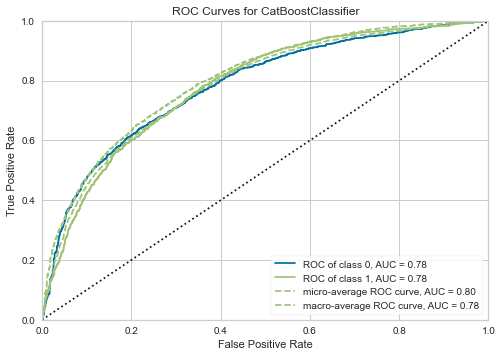

In [43]:
plot_model(best)


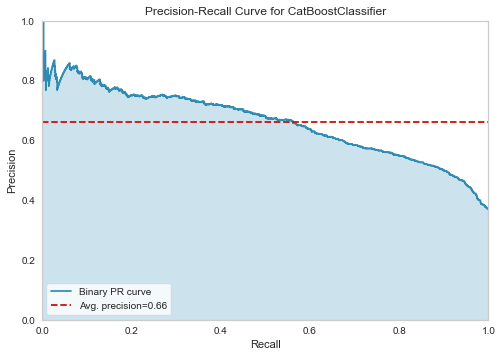

In [44]:
plot_model(best, plot='pr')


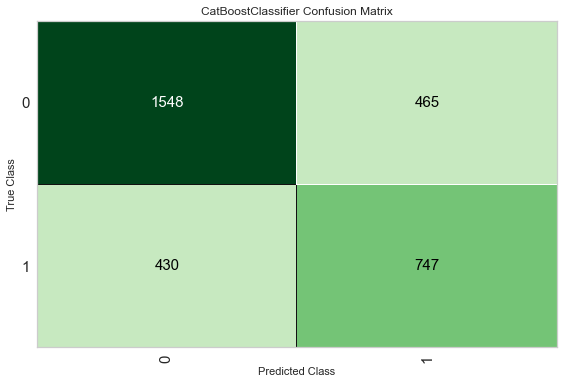

In [45]:
plot_model(best, plot='confusion_matrix')

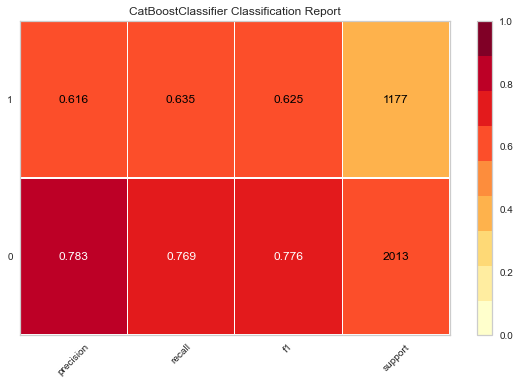

In [46]:
plot_model(best, plot='class_report')


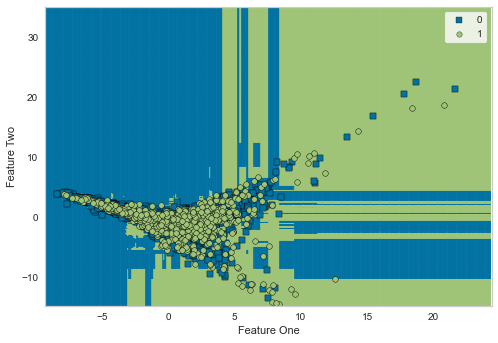

In [47]:
plot_model(best, plot='boundary')


In [48]:
plot_model(best, plot='parameter')


,Parameters
nan_mode,Min
eval_metric,Logloss
iterations,1000
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


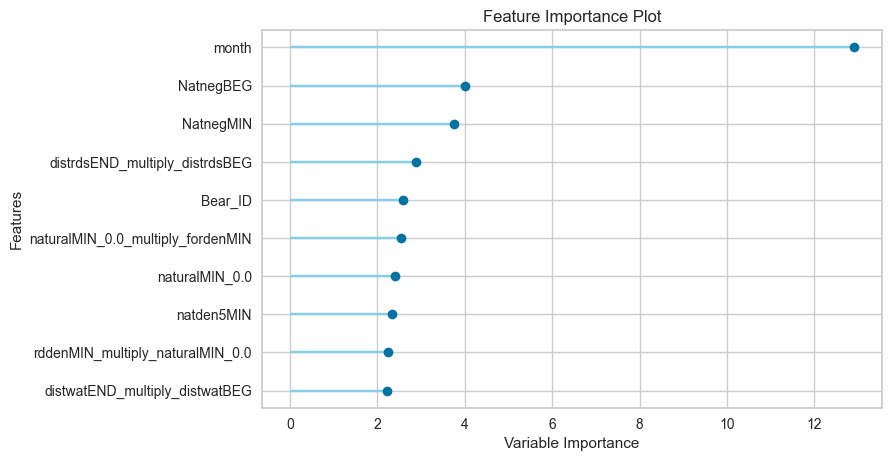

In [49]:
plot_model(best, plot='feature')